### A. CREACIÓN DE VARIABLES OBJETIVO

In [ ]:
df[["text", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",0.000000,0.0000,-0.788377
...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,-0.187500,-0.8096,-0.971243


In [ ]:
import pandas as pd

# Abrimos el fichero anterior de la carpeta
df = pd.read_csv("./data-unsupervised-sentiment-20210819.csv")

In [ ]:
# Comprobamos las dimensiones del df
df.shape

(7927, 29)

In [ ]:
# Función que hace la media ponderada

def media(num1,num2,num3):
  
  a = 1/5
  b = 1/5
  c = 3/5

  m = a*float(num1) + b*float(num2) + c*float(num3)

  return m

In [ ]:
import numpy as np

# Creamos la variable del sentimiento final en base a la media de los anteriores
variables = ['possitivity_textblob','possitivity_vader','possitivity_ibm']
df['sentiment_mean'] = df[variables].apply(np.mean, axis=1)
df[["text","sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,-0.656114,-0.187500,-0.8096,-0.971243


In [ ]:
# Limpio los datos que tienen 9999 en la variable possitivity_ibm
# Estos tweets están en idiomas no detectables por la librería 

df.loc[df['possitivity_ibm'] > 1]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean
190,190,296,296,@__rainy12__ Uber ne theka diya h personal dri...,Wed Aug 11,09:15:00,9,No,0,1,NaN,1197803093196303872,yashi_mk,India,False,23,37,[],1,__rainy12__,Twitter Web App,False,1250,[],[],0,0.2,0.0000,9999.0,3333.066667
208,208,329,329,i'm in an uber,Wed Aug 11,09:12:27,9,No,0,1,NaN,1396111086852660992,girlalmightyhry,Ot5 | harry's lane | larrie,False,173,330,[],0,No,Twitter for Android,False,683,[],[],0,0.0,0.0000,9999.0,3333.000000
228,228,382,382,"@NazneenTowhid @BajrangPunia Just Shut up, you...",Wed Aug 11,09:07:57,9,No,0,0,NaN,836633428149878784,Kittu9964,"Hyderabad, India",False,52,81,[],2,NazneenTowhid,Twitter for Android,False,4497,[],[],0,-0.6,0.5900,9999.0,3332.996667
284,284,485,485,@Colombo_Ladyy Uber eats 😬,Wed Aug 11,09:00:02,9,No,0,0,NaN,556861783,Wathmina,NaN,False,516,1387,[],1,Colombo_Ladyy,Twitter for Android,False,5614,[],[],0,0.0,-0.3976,9999.0,3332.867467
292,292,502,502,[DRAW] \n\n📍 Thomas &amp; Uber Cup (18 Agustus...,Wed Aug 11,08:58:23,8,Si,15,0,NaN,1376137421218217984,bingungnama,NaN,False,1,187,[],1,No,Twitter for Android,False,985,[],[],0,0.0,0.0000,9999.0,3333.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,7437,18428,18428,Uber ta horrivel,Mon Aug 09,13:59:39,13,No,0,3,NaN,1111962760349433984,Bruninh88917151,"Campo Grande, Brasil",False,188,251,[],0,No,Twitter for Android,False,5271,[],[],0,0.0,0.0000,9999.0,3333.000000
7442,7442,18451,18451,"@JennaEllisEsq Slow Uber day, jenny?",Mon Aug 09,13:58:42,13,No,0,0,NaN,427916103,BL33DZGR33N,Colorado,False,572,1668,[],1,JennaEllisEsq,Twitter for Android,False,21539,[],[],0,-0.3,0.0000,9999.0,3332.900000
7535,7535,18721,18721,@FerroTV 👏👏👏 $UBER 🚀🚀,Mon Aug 09,13:49:06,13,No,0,0,NaN,28627177,theoldrepublic,Not financial advice. USA,False,243,1178,[],1,FerroTV,Twitter Web App,False,12972,[],[],0,0.0,0.0000,9999.0,3333.000000
7583,7583,18879,18879,@Ty27AV Uber her home tf,Mon Aug 09,13:43:14,13,No,0,1,NaN,1413343110231470080,boirambino,NaN,False,19,96,[],1,Ty27AV,Twitter for iPhone,False,25,[],[],0,0.0,0.0000,9999.0,3333.000000


In [ ]:
df = df.drop(df.loc[df['possitivity_ibm'] > 1].index)

In [ ]:
# Comprobamos el nuevo df y las medidas del mismo
df.shape

(7809, 30)

### Definición de la variable objetivo

Actualmente ya tenemos definida la variable objetivo.

'sentiment_media' es una variable que especifica el grado de positividad de cada tweet en una escala de -1 a 1 pero, para que sea más claro, estandarizaremos la variable a la escala de 0 a 1. De esta forma podemos definir el grado de positividad como un porcentaje, es decir, el tweet es un X% positivo.

Como nos interesa que la variable objetivo sea categórica, dividiremos en 5 categorias la estandarización anterior, de forma que el tweet se considere:
- Muy negativo: 0 - 0.2
- Negativo: 0.2 - 0.4
- Neutro: 0.4 - 0.6
- Positivo: 0.6 - 0.8
- Muy positivo: 0.8 - 1

Tomando como intervalo cerrado el mayor valor de cada rango, salvo en la primera categoría, que también se incluirá el 0.

In [ ]:
# Creamos la escala 

min = -1
max = 1
def scaler(numero):
  result = (numero - min) / (max - min)
  return result

In [ ]:
# Normalizamos la variable 'sentiment_media'

df['sentiment_norm'] = df['sentiment_mean'].apply(lambda x: scaler(x))
df[["text",'sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


In [ ]:
# Definimos bins 
# Primer valor de los rangos -> 0
# Valor final de cada rango -> 0.2, 0.4, 0.6, 0.8 y 1
bins = [0, .2, .4, .6, .8, 1.]

# Definimos los nombres para cada categoría
names = ["Muy negativo", "Negativo", "Neutro", "Positivo", "Muy positivo"]

# Creamos la variable objetivo categórica
df['sentiment'] = pd.cut(df['sentiment_norm'], bins, labels = names)

In [ ]:
# Mostramos los sentimientos obtenidos
df[["text",'sentiment','sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,Negativo,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,Neutro,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Neutro,0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Positivo,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",Negativo,0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",Neutro,0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,Negativo,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",Muy negativo,0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,Muy negativo,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


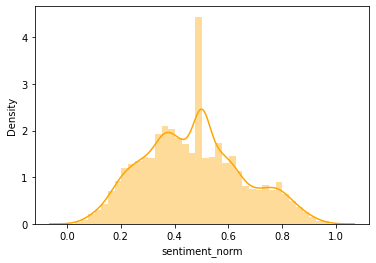

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Representamos con seaborn la variable objetivo para ver las diferentes categorias
numerica = sns.distplot(df['sentiment_norm'], color = 'orange')

In [ ]:
# Comprobamos el número de filas que tienen los 3 sentimientos = 0
df.loc[(df['possitivity_textblob']==0.)&(df['possitivity_vader']==0.)&(df['possitivity_ibm']==0.)].shape

(633, 32)

In [ ]:
# Comprobamos el número de filas que tienen media sentiment = 0
df.loc[(df['sentiment_mean']==0.)].shape

(633, 32)

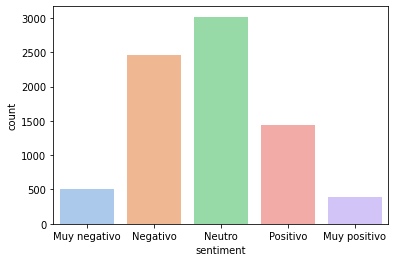

In [ ]:
categorica = sns.countplot(x='sentiment', data=df, palette = 'pastel')

In [ ]:
df['sentiment'].value_counts()

Neutro          3018
Negativo        2458
Positivo        1433
Muy negativo     505
Muy positivo     395
Name: sentiment, dtype: int64

### B. PRIMEROS MODELOS

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'text', 'created_at',
       'created_at_time', 'created_at_hour', 'retweeted', 'retweet_count',
       'favorite_count', 'user_ verified', 'user_id', 'user_name',
       'user_location', 'user_notificacion', 'user_followers', 'user_friends',
       'user_withheld_in_countries', 'mentions_in_tweet', 'is_reply',
       'source_device', 'finished_tweet', 'status_count', 'hashtags_text',
       'hastags_indices', 'hastags_in_tweet', 'possitivity_textblob',
       'possitivity_vader', 'possitivity_ibm', 'sentiment_mean',
       'sentiment_norm', 'sentiment'],
      dtype='object')

In [ ]:
# Defino las variables dependientes que eliminaremos del df
vars = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'text', 
        'created_at_time', 'hashtags_text', 'hastags_indices',
        'possitivity_textblob', 'possitivity_vader', 'possitivity_ibm', 
        'sentiment_mean', 'sentiment_norm']
df_limpio = df.drop(vars,axis=1)

In [ ]:
df_limpio.shape

(7809, 20)

In [ ]:
df_limpio.dtypes

created_at                      object
created_at_hour                  int64
retweeted                       object
retweet_count                    int64
favorite_count                   int64
user_ verified                 float64
user_id                          int64
user_name                       object
user_location                   object
user_notificacion                 bool
user_followers                   int64
user_friends                     int64
user_withheld_in_countries      object
mentions_in_tweet                int64
is_reply                        object
source_device                   object
finished_tweet                    bool
status_count                     int64
hastags_in_tweet                 int64
sentiment                     category
dtype: object

In [ ]:
# Cojo las columnas que son object
cols = df_limpio[df_limpio.select_dtypes(['object']).columns] 
cols

,created_at,retweeted,user_name,user_location,user_withheld_in_countries,is_reply,source_device
0,Wed Aug 11,Si,ShieldVoC,"Stockholm, Sweden",[],No,test-shield-bot
1,Wed Aug 11,No,__Soini,"Namibia, Okaanga village",[],No,Twitter Web App
2,Wed Aug 11,No,ASHJY97,"Leeds, England",[],footballdaily,Twitter for iPhone
3,Wed Aug 11,No,GurmeetSinghSh6,NaN,[],Prashan32439454,Twitter for Android
4,Wed Aug 11,No,sbwcws,NaN,[],No,News Bot Algo
...,...,...,...,...,...,...,...
7922,Mon Aug 09,No,JohnScarpitta1,NaN,[],JohnScarpitta1,Twitter for iPhone
7923,Mon Aug 09,No,pessi_lover,NaN,[],CoolABADev,Twitter for iPhone
7924,Mon Aug 09,No,pjshaw192,NaN,[],catekitchen,Twitter for iPad
7925,Mon Aug 09,No,CamChapoComedy,NaN,[],No,Twitter for iPhone


In [ ]:
# Cambio el tipo a categoría
df_limpio[cols.keys()] = df_limpio.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
df_limpio.dtypes

created_at                    category
created_at_hour                  int64
retweeted                     category
retweet_count                    int64
favorite_count                   int64
user_ verified                 float64
user_id                          int64
user_name                     category
user_location                 category
user_notificacion                 bool
user_followers                   int64
user_friends                     int64
user_withheld_in_countries    category
mentions_in_tweet                int64
is_reply                      category
source_device                 category
finished_tweet                    bool
status_count                     int64
hastags_in_tweet                 int64
sentiment                     category
dtype: object

In [ ]:
df_limpio.isna().sum()

created_at                       0
created_at_hour                  0
retweeted                        0
retweet_count                    0
favorite_count                   0
user_ verified                7809
user_id                          0
user_name                        0
user_location                 2686
user_notificacion                0
user_followers                   0
user_friends                     0
user_withheld_in_countries       0
mentions_in_tweet                0
is_reply                         0
source_device                    0
finished_tweet                   0
status_count                     0
hastags_in_tweet                 0
sentiment                        0
dtype: int64

#### MODELO 1

Hemos eliminado las variables que son linealmente dependientes o que tienen relación con otras de la bbdd. Además, hemos comprobado el número de nan que hay en cada variable. Simplemente hemos comprobado los NaN ya que la limpieza de la bbdd será posterior. 

Observamos que la verificación del usuario es nula en todos los casos, por lo que no creemos que esta info aporte nada al modelo que vamos a realizar. Igualmente, metemos esta variable al primer modelo para comprobar (productivizar un modelo) si el modelo mejora cuando le quitamos los NaN. 

Además vemos que la variable que especifica la localización tiene un alto número de NaN. Tendremos que estudiar en la limpieza como imputar o como utilizar esta variable. De momento, la metemos al modelo tal y como aparece.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos la muestra en train y test

X = df_limpio.drop(['sentiment'],axis=1)
y = df_limpio['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
X_train.dtypes

created_at                    category
created_at_hour                  int64
retweeted                     category
retweet_count                    int64
favorite_count                   int64
user_ verified                 float64
user_id                          int64
user_name                     category
user_location                 category
user_notificacion                 bool
user_followers                   int64
user_friends                     int64
user_withheld_in_countries    category
mentions_in_tweet                int64
is_reply                      category
source_device                 category
finished_tweet                    bool
status_count                     int64
hastags_in_tweet                 int64
dtype: object

In [ ]:
y_train.dtypes

CategoricalDtype(categories=['Muy negativo', 'Negativo', 'Neutro', 'Positivo',
                  'Muy positivo'],
                 ordered=True)

In [ ]:
# Creamos una función para comparar los resultados en boxplot

def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos que utilizaremos

models = []
models.append(('LR', LogisticRegression(random_state=12345)))
models.append(('RFC', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC()))

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### LOGISTIC REGRESION

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

ValueError: ignored